In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import swirlpy

# Plot
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.pyplot import cm
from matplotlib.colors import LogNorm
from matplotlib import colors
%matplotlib inline

# Code
import swirl

# Latex
#plt.rcParams['figure.dpi'] = 80
#plt.rcParams['figure.figsize'] = [7.0, 5.0]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
#plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['figure.titlesize'] = 11
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

# Load data

In [3]:
dz = 1
snapshots = range(240,7201,240)
zrange = np.arange(0,131,dz)

data = []
for t in snapshots:
    data.append(np.load('newdata/vortexdata_t'+str(t).zfill(4)+'_final.npy'))
    
data_all = np.vstack(data)

x = data_all[:,0]
y = data_all[:,1]
z = data_all[:,2]
radius = data_all[:,3]*10
rortex = data_all[:,4]
rortex_std = data_all[:,5]
orient = data_all[:,6]
beta = data_all[:,7]
beta_std = data_all[:,8]
Sv = data_all[:,9]
Sv_std = data_all[:,10]
Sh = data_all[:,11]
Sh_std = data_all[:,12]
Bz = data_all[:,13]
Bz_std = data_all[:,14]
MSz = data_all[:,15]
MSz_std = data_all[:,16]
period = 4.*np.pi/np.abs(rortex)

# Plot Test_stats_z

In [4]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

def percentiles(data):
    sigma = 34
    sigma2 = 47.5
    percen = np.percentile(data, [50-sigma2,50-sigma,50,50+sigma,50+sigma2])
    return percen

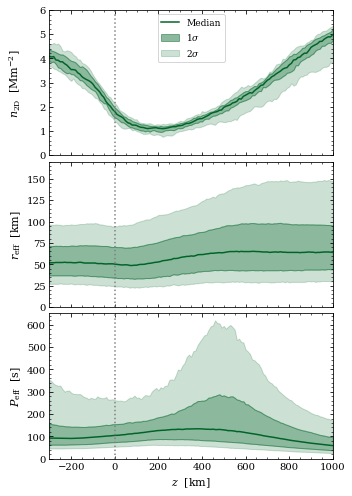

In [5]:
%matplotlib inline
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(5,7), sharex=True, sharey=False)

dz = 1
# Data
zrange = np.arange(0,131,dz)
n1 = zrange.shape[0]
n2 = len(data)

Nz = np.zeros((n1,n2))
k = 0
for i in zrange:
    for j in np.arange(n2):
        mask = np.where(data[j][:,2]==i)
        Nz[k,j] = mask[0].shape[0]
    k+=1

z_shift = (zrange-30)*10

# Colors
winter = cm.get_cmap('Greens_r')
cBlu = winter(0.1)
######################################
ax = axes[0]
Area = 9.8*9.8
# Plot
Nz_p = []
for i in np.arange(Nz.shape[0]):
    Nz_p.append(percentiles(Nz[i]))
# Normalize to area
Nz_p = np.vstack(Nz_p)/Area
ax.plot(z_shift, Nz_p[:,2], 
        color=cBlu, label=r'Median')
ax.fill_between(z_shift, Nz_p[:,1], Nz_p[:,3],
                alpha=0.45,
                color=cBlu,
                edgecolor=cBlu, label=r'$1\sigma$')
ax.fill_between(z_shift, Nz_p[:,0], Nz_p[:,1],
                alpha=0.2,
                color=cBlu,
                edgecolor=cBlu, label=r'$2\sigma$')
ax.fill_between(z_shift, Nz_p[:,3], Nz_p[:,4],
                alpha=0.2,
                color=cBlu,
                edgecolor=cBlu)

# Labels
ax.set_ylabel(r'$n_{\rm 2D}~~[{\rm Mm}^{-2}]$')

# Axis
ax.set_xlim(-300,1000)
ax.set_ylim(0,6)
ax.axvline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()
ax.legend(loc='upper center')

######################################

ax = axes[1]

radius_p = []
for i in zrange:
    mask = np.where(z==i)
    radius_p.append(percentiles(radius[mask]))
radius_p = np.vstack(radius_p)
# Plot
ax.plot(z_shift, radius_p[:,2], 
        color=cBlu)
ax.fill_between(z_shift, radius_p[:,1], radius_p[:,3],
                alpha=0.45,
                color=cBlu,
                edgecolor=cBlu)
ax.fill_between(z_shift, radius_p[:,0], radius_p[:,1],
                alpha=0.2,
                color=cBlu,
                edgecolor=cBlu)
ax.fill_between(z_shift, radius_p[:,3], radius_p[:,4],
                alpha=0.2,
                color=cBlu,
                edgecolor=cBlu)

# Labels
ax.set_ylabel(r'$r_{\rm eff}~~[{\rm km}]$')

# Axis
ax.set_ylim(0,170)
ax.axvline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

######################################
ax = axes[2]

period_p = []
for i in zrange:
    mask = np.where(z==i)
    period_p.append(percentiles(period[mask]))
period_p = np.vstack(period_p)
# Plot
ax.plot(z_shift, period_p[:,2], 
        color=cBlu, label=r'Median')
ax.fill_between(z_shift, period_p[:,1], period_p[:,3],
                alpha=0.45,
                color=cBlu,
                edgecolor=cBlu, label=r'$1\sigma$')
ax.fill_between(z_shift, period_p[:,0], period_p[:,1],
                alpha=0.2,
                color=cBlu,
                edgecolor=cBlu, label=r'$2\sigma$')
ax.fill_between(z_shift, period_p[:,3], period_p[:,4],
                alpha=0.2,
                color=cBlu,
                edgecolor=cBlu)

# Labels
ax.set_xlabel(r'$z~~[{\rm km}]$')
ax.set_ylabel(r'$P_{\rm eff}~~[{\rm s}]$')

# Axis
ax.set_ylim(0,650)
ax.axvline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

#####################################

fig.align_ylabels(axes[:])

plt.tight_layout(h_pad=0.1)
#plt.savefig('../Figures/Test_Stat_z.pdf', bbox_inches = 'tight', pad_inches = 0.01)
plt.savefig('../Figures/Test_Stat_z_percentiles.png', dpi=200, bbox_inches = 'tight', pad_inches = 0.2)

# Plot: Test_Stat_Bz_Rz_r

/net/cephfs/home/jcaniv/my_venv/lib/python3.7/site-packages/ipykernel_launcher.py:213: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


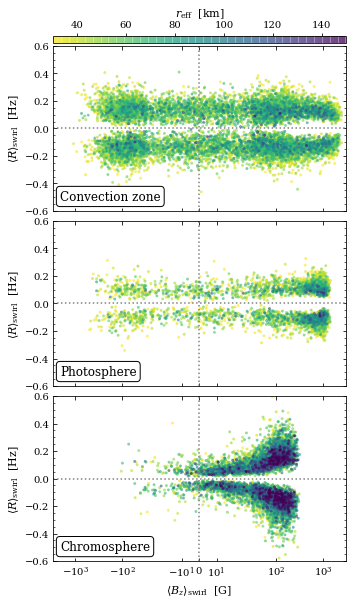

In [6]:
%matplotlib inline
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(5,8), sharex=True, sharey=True)

s=4
alpha=0.5
vmin=30
vmax = 150
marker='o'
cmap='viridis_r'

conv, = np.where(np.logical_and(z<30,z>0))
conv, = np.where(z==10)
Bz_conv = Bz[conv]
rortex_conv = rortex[conv]
Sh_conv = Sh[conv]
Sv_conv = Sv[conv]
radius_conv = radius[conv]
beta_conv = beta[conv]
T_conv = 4.*np.pi/np.abs(rortex_conv)

chrom, = np.where(np.logical_and(z>90,z<120))
chrom,=np.where(z==100)
Bz_chrom = Bz[chrom]
rortex_chrom = rortex[chrom]
Sh_chrom = Sh[chrom]
Sv_chrom = Sv[chrom]
radius_chrom = radius[chrom]
beta_chrom = beta[chrom]
T_chrom = 4.*np.pi/np.abs(rortex_chrom)

phot, = np.where(np.logical_and(z>40, z<70))
phot, = np.where(z==40)
Bz_phot = Bz[phot]
rortex_phot = rortex[phot]
Sh_phot = Sh[phot]
Sv_phot = Sv[phot]
radius_phot = radius[phot]
beta_phot = beta[phot]
T_phot = 4.*np.pi/np.abs(rortex_phot)
######################################

ax = axes[0]
arg = np.argsort(radius_conv)
Bz_conv = Bz_conv[arg]
rortex_conv = rortex_conv[arg]
radius_conv = radius_conv[arg]
# Plot
im = ax.scatter(Bz_conv, 
                rortex_conv, 
                c=radius_conv, 
                s=s, 
                alpha=alpha,
                vmin=vmin, 
                vmax=vmax, 
                marker=marker,
                cmap=cmap)

H, xedges, yedges = np.histogram2d(Bz_conv,
                                   rortex_conv,
                                   bins=30)

xedges = 0.5*(xedges[1:] + xedges[:-1])
yedges = 0.5*(yedges[1:] + yedges[:-1])
#ax.contour(xedges, yedges, H.T, levels=[int(H.max()*2./5.),int(H.max()*4./5.)], origin='lower', colors='silver')


# Title
#ax.set_title('Convection')

# Labels
ax.set_ylabel(r'$\langle R \rangle_{\rm swirl}~~[{\rm Hz}]$')

# Axis
ax.set_xlim(-3000,3000)
ax.set_ylim(-0.6,0.6)
ax.axvline(0, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')
ax.set_xscale('symlog', linthresh=30)

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Add text
ax.text(-2.1e3, 
        -0.52,
        r'Convection zone',
        size=12,
        bbox=dict(boxstyle="round", 
                  fc=(1.0, 1.0, 1.0),
                  ec=(0.0, 0.0, 0.0),)
       )

######################################

ax = axes[1]

arg = np.argsort(radius_phot)
Bz_phot = Bz_phot[arg]
rortex_phot = rortex_phot[arg]
radius_phot = radius_phot[arg]
# Plot
im = ax.scatter(Bz_phot, 
                rortex_phot, 
                c=radius_phot, 
                s=s, 
                alpha=alpha,
                vmin=vmin, 
                vmax=vmax, 
                marker=marker,
                cmap=cmap)

H, xedges, yedges = np.histogram2d(Bz_phot,
                                   rortex_phot,
                                   bins=30)

xedges = 0.5*(xedges[1:] + xedges[:-1])
yedges = 0.5*(yedges[1:] + yedges[:-1])
#ax.contour(xedges, yedges, H.T, levels=[int(H.max()*2./5.),int(H.max()*4./5.)], origin='lower', colors='silver')

# Title
#ax.set_title('Photosphere')

# Labels
ax.set_ylabel(r'$\langle R \rangle_{\rm swirl}~~[{\rm Hz}]$')

# Axis
#ax.set_xlim(-300,1000)
#ax.set_ylim(0,400)
ax.axvline(0, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Add text
ax.text(-2.1e3, 
        -0.52,
        r'Photosphere',
        size=12,
        bbox=dict(boxstyle="round", 
                  fc=(1.0, 1.0, 1.0),
                  ec=(0.0, 0.0, 0.0),)
       )

######################################

ax = axes[2]

arg = np.argsort(radius_chrom)
Bz_chrom = Bz_chrom[arg]
rortex_chrom = rortex_chrom[arg]
radius_chrom = radius_chrom[arg]
# Plot
im = ax.scatter(Bz_chrom, 
                rortex_chrom, 
                c=radius_chrom, 
                s=s, 
                alpha=alpha,
                vmin=vmin, 
                vmax=vmax, 
                marker=marker,
                cmap=cmap)


H, xedges, yedges = np.histogram2d(Bz_chrom,
                                   rortex_chrom,
                                   bins=30)

xedges = 0.5*(xedges[1:] + xedges[:-1])
yedges = 0.5*(yedges[1:] + yedges[:-1])
#ax.contour(xedges, yedges, H.T, levels=[int(H.max()*2./5.),int(H.max()*4./5.)], origin='lower', colors='silver')

# Title
#ax.set_title('Chromosphere')

# Labels
ax.set_ylabel(r'$\langle R \rangle_{\rm swirl}~~[{\rm Hz}]$')
ax.set_xlabel(r'$\langle B_z \rangle_{\rm swirl}~~[{\rm G}]$')

# Axis
#ax.set_xlim(-300,1000)
#ax.set_ylim(0,400)
ax.axvline(0, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Add text
ax.text(-2.1e3, 
        -0.52,
        r'Chromosphere',
        size=12,
        bbox=dict(boxstyle="round", 
                  fc=(1.0, 1.0, 1.0),
                  ec=(0.0, 0.0, 0.0),)
       )

#####################################

# Colorbar

cb_ax = fig.add_axes([0.157, 0.98, 0.814, 0.012])
cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal')
cbar.set_label(r'$r_{\rm eff}~~[{\rm km}]$')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
#####################################

fig.tight_layout(h_pad=0.1)
#fig.savefig('../Figures/Test_Stat_Bz_Rz_r.pdf', bbox_inches = 'tight', pad_inches = 0.01)
#fig.savefig('../Figures/Test_Stat_Bz_Rz_r.png', dpi=200, bbox_inches = 'tight', pad_inches = 0.01)
fig.savefig('../Figures/Test_Stat_Bz_Rz_r.png', dpi=200, bbox_inches = 'tight', pad_inches = 0.2)

## Relation Alfvén speed, Rotation speed and radius

In [7]:
dz = 1
snapshots = range(240,7201,240)
zrange = np.arange(0,131,dz)

data = []
for t in snapshots:
    data.append(np.load('newdata/vortexdata_t'+str(t).zfill(4)+'_final.npy'))
    
data_all = np.vstack(data)

x = data_all[:,0]
y = data_all[:,1]
z = data_all[:,2]
radius = data_all[:,3]*10
rortex = data_all[:,4]
rortex_std = data_all[:,5]
orient = data_all[:,6]
beta = data_all[:,7]
beta_std = data_all[:,8]
Sv = data_all[:,9]
Sv_std = data_all[:,10]
Sh = data_all[:,11]
Sh_std = data_all[:,12]
Bz = data_all[:,13]
Bz_std = data_all[:,14]
MSz = data_all[:,15]
MSz_std = data_all[:,16]
rho = data_all[:,17]
rho_std = data_all[:,18]
v_alfven = Bz/np.sqrt(4.*np.pi*rho)
period = 4.*np.pi/np.abs(rortex)

/net/cephfs/home/jcaniv/my_venv/lib/python3.7/site-packages/ipykernel_launcher.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


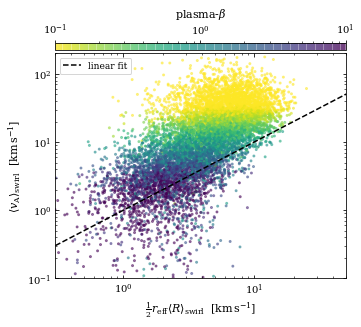

In [8]:
%matplotlib inline
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(5,4))

s=4
alpha=0.5
vmin=30
vmax = 150
marker='o'
cmap='viridis_r'

chrom, = np.where(np.logical_and(z>90,z<120))
chrom,=np.where(z==100)
Bz_chrom = Bz[chrom]
rortex_chrom = rortex[chrom]
Sh_chrom = Sh[chrom]
Sv_chrom = Sv[chrom]
radius_chrom = radius[chrom]
beta_chrom = beta[chrom]
T_chrom = 4.*np.pi/np.abs(rortex_chrom)
valf_chrom = v_alfven[chrom]


ax = axes

arg = np.argsort(radius_chrom)
valf_chrom = valf_chrom[arg]
rortex_chrom = rortex_chrom[arg]
radius_chrom = radius_chrom[arg]
beta_chrom = beta_chrom[arg]
# Plot
im = ax.scatter(np.abs(rortex_chrom)/2*(radius_chrom), 
                np.sqrt(2.)*(np.abs(valf_chrom)/1e5),
                c=beta_chrom, 
                s=s, 
                alpha=alpha,
                marker=marker,
                cmap=cmap,
                norm=colors.LogNorm(vmin=1e-1, vmax=1e1))


# Title
#ax.set_title('Chromosphere')

# Labels
ax.set_ylabel(r'$\langle v_{\rm A} \rangle_{\rm swirl}~~[{\rm km}\,{\rm s}^{-1}]$')
ax.set_xlabel(r'$\frac{1}{2}r_{\rm eff}\langle R \rangle_{\rm swirl}~~[{\rm km}\,{\rm s}^{-1}]$')

# Axis
#ax.set_xlim(-300,1000)
#ax.set_ylim(0,400)
ax.axvline(0, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Add text
# ax.text(-2.1e3, 
#         -0.52,
#         r'Chromosphere',
#         size=12,
#         bbox=dict(boxstyle="round", 
#                   fc=(1.0, 1.0, 1.0),
#                   ec=(0.0, 0.0, 0.0),)
#        )

#####################################

xrange=np.arange(100)
ax.plot(xrange, np.abs(xrange), color='k', linestyle='--', label='linear fit')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([0.3,50])
ax.set_ylim([0.1,200])
# Colorbar

cb_ax = fig.add_axes([0.163, 0.975, 0.807, 0.023])
cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal')
cbar.set_label(r'plasma-$\beta$')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
#####################################
ax.legend()
fig.tight_layout(h_pad=0.1)
fig.savefig('../Figures/Test_Stat_BrR_relation.png', dpi=200, bbox_inches = 'tight', pad_inches = 0.2)

In [9]:
x = np.abs(rortex_chrom)/2*(radius_chrom)
y = np.abs(valf_chrom)/1e5

myrho = np.corrcoef(x,y)
print(myrho)

# mask = np.where(beta_chrom < 1000)
# x = x[mask]
# y = y[mask]

myrho = np.corrcoef(x,y)
print(myrho)

from scipy.optimize import curve_fit

def fit_fun(x, a, b):
    y_res = a*(x) + b
    return y_res

params, cov = curve_fit(fit_fun, np.log10(x), np.log10(y))
  
fitA = params[0]
fitB = params[1]

print(params)
print(cov)

[[1.         0.45326014]
 [0.45326014 1.        ]]
[[1.         0.45326014]
 [0.45326014 1.        ]]
[1.16270776 0.14295655]
[[ 0.00023574 -0.00013747]
 [-0.00013747  0.00010275]]


/net/cephfs/home/jcaniv/my_venv/lib/python3.7/site-packages/ipykernel_launcher.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


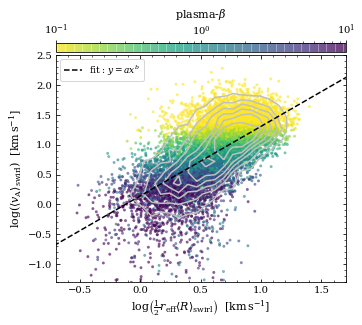

In [10]:


%matplotlib inline
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(5,4))

s=4
alpha=0.5
vmin=30
vmax = 150
marker='o'
cmap='viridis_r'

chrom, = np.where(np.logical_and(z>90,z<120))
chrom,=np.where(z==100)
Bz_chrom = Bz[chrom]
rortex_chrom = rortex[chrom]
Sh_chrom = Sh[chrom]
Sv_chrom = Sv[chrom]
radius_chrom = radius[chrom]
beta_chrom = beta[chrom]
T_chrom = 4.*np.pi/np.abs(rortex_chrom)
valf_chrom = v_alfven[chrom]


ax = axes

arg = np.argsort(radius_chrom)
valf_chrom = valf_chrom[arg]
rortex_chrom = rortex_chrom[arg]
radius_chrom = radius_chrom[arg]
beta_chrom = beta_chrom[arg]
# Plot
im = ax.scatter(np.log10(np.abs(rortex_chrom)/2*(radius_chrom)), 
                np.log10(np.abs(valf_chrom)/1e5),
                c=beta_chrom, 
                s=s, 
                alpha=alpha,
                marker=marker,
                cmap=cmap,
                norm=colors.LogNorm(vmin=1e-1, vmax=1e1))


H, xedges, yedges = np.histogram2d(np.log10(np.abs(rortex_chrom)/2*(radius_chrom)),
                                   np.log10(np.abs(valf_chrom)/1e5),
                                   bins=30)

xedges = 0.5*(xedges[1:] + xedges[:-1])
yedges = 0.5*(yedges[1:] + yedges[:-1])
ax.contour(xedges, yedges, H.T, levels=[20, 40, 60, 80, 100, 120], origin='lower', colors='silver')


# Title
#ax.set_title('Chromosphere')

# Labels
ax.set_ylabel(r'${\rm log}\left(\langle v_{\rm A} \rangle_{\rm swirl}\right)~~[{\rm km}\,{\rm s}^{-1}]$')
ax.set_xlabel(r'${\rm log}\left(\frac{1}{2}r_{\rm eff}\langle R \rangle_{\rm swirl}\right)~~[{\rm km}\,{\rm s}^{-1}]$')

# Axis
#ax.set_xlim(-300,1000)
#ax.set_ylim(0,400)

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Add text
# ax.text(-2.1e3, 
#         -0.52,
#         r'Chromosphere',
#         size=12,
#         bbox=dict(boxstyle="round", 
#                   fc=(1.0, 1.0, 1.0),
#                   ec=(0.0, 0.0, 0.0),)
#        )

#####################################

xrange=np.arange(-1.0,2.0,0.1)
ax.plot(xrange, fit_fun(xrange, params[0], params[1]), color='k', linestyle='--', label=r'fit : $y = a x^b$')

#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim([-0.7,1.7])
ax.set_ylim([-1.3,2.5])
# Colorbar

cb_ax = fig.add_axes([0.165, 0.96, 0.807, 0.03])
cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal')
cbar.set_label(r'plasma-$\beta$')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
#####################################
ax.legend(loc='upper left')
fig.tight_layout(h_pad=0.1)
fig.savefig('../Figures/Test_Stat_BrR_relation_log.png', dpi=200, bbox_inches = 'tight', pad_inches = 0.2)


# Plot: Appendix_isolated_swirl_analysis

In [11]:
N = 100
xi = 859
yi = 125
zi = 193
zf = zi

t = 5774
    
box = swirlpy.Box(xi=[xi,yi,zi], xf=[xi+N,yi+N,zf+1],boundary=[0,0,0])
box.read(t, 
         '/home/cluster/jcaniv/shares/job3D960x960x280_v50_superhighcad/COBOLD_sim', 
         ['v','B','Pre', 'rho'])


vz = box.v.z[:,:,0]
vy = box.v.y[:,:,0]
vx = box.v.x[:,:,0]
Bz = box.B.z[:,:,0]
By = box.B.y[:,:,0]
Bx = box.B.x[:,:,0]
P = box.Pre.s[:,:,0]
rho = box.rho.s[:,:,0]
Pm = (Bz**2 + By**2 + Bx**2)/(8*np.pi)
Ptot = Pm + P
vA = np.sqrt(2*Pm/rho)
beta = P/Pm

vortexdata = np.load('../Test_Statistics/newdata/structures3D_all_t5774.npy', allow_pickle=True)

vortex = np.vstack(vortexdata)

xv = np.array(vortex[:,0], dtype=int)
yv = np.array(vortex[:,1], dtype=int)
zv = np.array(vortex[:,2], dtype=int)
radius = np.array(vortex[:,3], dtype=int)

mask = np.where(zv==100)
xv = xv[mask]-xi
yv = yv[mask]-yi
radius = radius[mask]

# Grid for vector plot
xrange = np.arange(0,N)
yrange = np.arange(0,N)
xgrid, ygrid = np.meshgrid(xrange,yrange)
xgrid[...] = xgrid[...].T
ygrid[...] = ygrid[...].T

v Loaded!
B Loaded!
Pre Loaded!
rho Loaded!


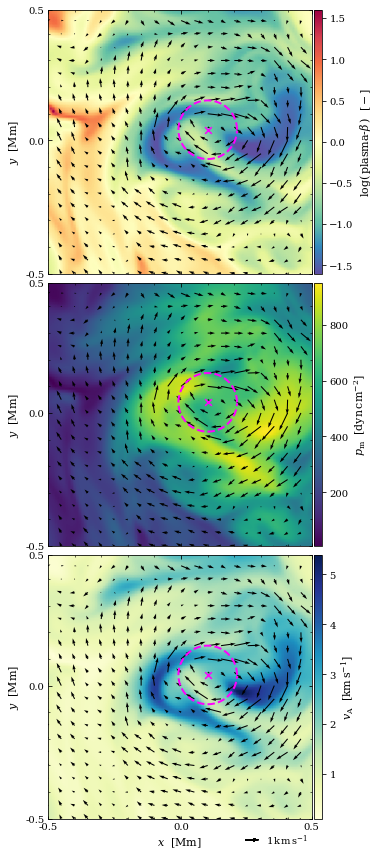

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5,12),sharex=True, sharey=True)
ax = axes[0]

im1=ax.imshow(np.log10(beta).T, origin='lower', cmap='Spectral_r', vmax=1.6, vmin=-1.6)
ax.set_xlim([0,99])
ax.set_ylim([0,99])
l=5
ax.quiver(xgrid[::l,::l],ygrid[::l,::l],vx[::l,::l],vy[::l,::l], angles='xy', width=0.004)

ax.scatter(xv,yv,s=45,marker='x',color='magenta')
theta = np.arange(0,2*np.pi,0.05)
for xc,yc,r in zip(xv,yv,radius):
    xcircle = xc+r*np.cos(theta)
    ycircle = yc+r*np.sin(theta)
    ax.plot(xcircle,ycircle,linestyle='--',color='magenta',linewidth=2.0)
    
ax.set_xticks([0,N/2,N-1])
ax.set_yticks([0,N/2,N-1])
ax.set_xticklabels([r'-0.5',r'0.0',r'0.5'])
ax.set_yticklabels([r'-0.5',r'0.0',r'0.5'])


ax.set_aspect('equal')
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()


ax.set_ylabel(r'$y~~[{\rm Mm}]$')

# Colorbar
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size = '3%', pad = 0.04)
fig.add_axes(cax)
fig.colorbar(im1, cax = cax, orientation = 'vertical', label=r'${\rm log} (\,$plasma-$\beta\,)~~[{\rm -}]$')

########

ax = axes[1]
im1=ax.imshow(Pm.T, origin='lower', cmap='viridis')
ax.set_xlim([0,99])
ax.set_ylim([0,99])
l=5
ax.quiver(xgrid[::l,::l],ygrid[::l,::l],vx[::l,::l],vy[::l,::l], angles='xy', width=0.004)

ax.scatter(xv,yv,s=45,marker='x',color='magenta')
theta = np.arange(0,2*np.pi,0.05)
for xc,yc,r in zip(xv,yv,radius):
    xcircle = xc+r*np.cos(theta)
    ycircle = yc+r*np.sin(theta)
    ax.plot(xcircle,ycircle,linestyle='--',color='magenta',linewidth=2.0)
    
ax.set_xticks([0,N/2,N-1])
ax.set_yticks([0,N/2,N-1])
ax.set_xticklabels([r'-0.5',r'0.0',r'0.5'])
ax.set_yticklabels([r'-0.5',r'0.0',r'0.5'])

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

ax.set_ylabel(r'$y~~[{\rm Mm}]$')

# Colorbar
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size = '3%', pad = 0.04)
fig.add_axes(cax)
fig.colorbar(im1, cax = cax, orientation = 'vertical', label=r'$p_{\rm m}~~[{\rm dyn}\,{\rm cm}^{-2}]$')

##########

ax = axes[2]
im1=ax.imshow(vA.T/1e6, origin='lower', cmap='YlGnBu')
ax.set_xlim([0,99])
ax.set_ylim([0,99])
l=5
q= ax.quiver(xgrid[::l,::l],ygrid[::l,::l],vx[::l,::l],vy[::l,::l], angles='xy', width=0.004)
ax.quiverkey(q, X = 0.8, Y = -0.08,
             U = 1e6, label =r'$1\,{\rm km}\,{\rm s}^{-1}$', labelpos='E')

ax.scatter(xv,yv,s=45,marker='x',color='magenta')
theta = np.arange(0,2*np.pi,0.05)
for xc,yc,r in zip(xv,yv,radius):
    xcircle = xc+r*np.cos(theta)
    ycircle = yc+r*np.sin(theta)
    ax.plot(xcircle,ycircle,linestyle='--',color='magenta',linewidth=2.0)
    
ax.set_xticks([0,N/2,N-1])
ax.set_yticks([0,N/2,N-1])
ax.set_xticklabels([r'-0.5',r'0.0',r'0.5'])
ax.set_yticklabels([r'-0.5',r'0.0',r'0.5'])

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

ax.set_xlabel(r'$x~~[{\rm Mm}]$')
ax.set_ylabel(r'$y~~[{\rm Mm}]$')

# Colorbar
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size = '3%', pad = 0.04)
fig.add_axes(cax)
fig.colorbar(im1, cax = cax, orientation = 'vertical', label=r'$v_{\rm A}~~[{\rm km}\,{\rm s}^{-1}]$')



# Figure pads
fig.tight_layout(h_pad=0.00)


fig.savefig('../Figures/Appendix_isolated_swirl_analysis.png', dpi=200, bbox_inches = 'tight', pad_inches = 0.2)

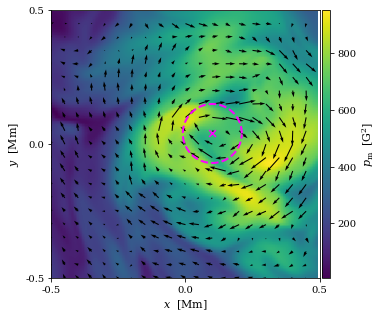

In [13]:
fig, axes = plt.subplots(figsize=(5,5))
ax = axes

dPm = np.gradient(Pm)
dPm[0] = ndimage.gaussian_filter(dPm[0], 5)
dPm[1] = ndimage.gaussian_filter(dPm[1], 5)
im1=ax.imshow(Pm.T, origin='lower', cmap='viridis')
ax.set_xlim([0,99])
ax.set_ylim([0,99])
l=5
ax.quiver(xgrid[::l,::l],ygrid[::l,::l],vx[::l,::l],vy[::l,::l], angles='xy', width=0.004)

ax.scatter(xv,yv,s=45,marker='x',color='magenta')
theta = np.arange(0,2*np.pi,0.05)
for xc,yc,r in zip(xv,yv,radius):
    xcircle = xc+r*np.cos(theta)
    ycircle = yc+r*np.sin(theta)
    ax.plot(xcircle,ycircle,linestyle='--',color='magenta',linewidth=2.0)
    
ax.set_xticks([0,N/2,N])
ax.set_yticks([0,N/2,N])
ax.set_xticklabels([r'-0.5',r'0.0',r'0.5'])
ax.set_yticklabels([r'-0.5',r'0.0',r'0.5'])

ax.set_xlabel(r'$x~~[{\rm Mm}]$')
ax.set_ylabel(r'$y~~[{\rm Mm}]$')

# Colorbar
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size = '3%', pad = 0.04)
fig.add_axes(cax)
fig.colorbar(im1, cax = cax, orientation = 'vertical', label=r'$p_{\rm m}~~[{\rm G}^2]$')

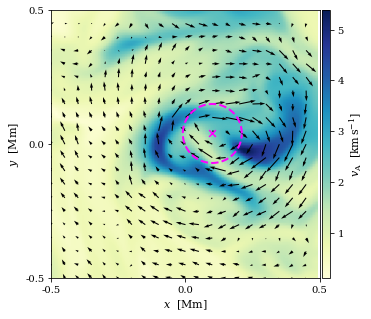

In [14]:
fig, axes = plt.subplots(figsize=(5,5))
ax = axes

im1=ax.imshow(vA.T/1e6, origin='lower', cmap='YlGnBu')
ax.set_xlim([0,99])
ax.set_ylim([0,99])
l=5
ax.quiver(xgrid[::l,::l],ygrid[::l,::l],vx[::l,::l],vy[::l,::l], angles='xy', width=0.004)

ax.scatter(xv,yv,s=45,marker='x',color='magenta')
theta = np.arange(0,2*np.pi,0.05)
for xc,yc,r in zip(xv,yv,radius):
    xcircle = xc+r*np.cos(theta)
    ycircle = yc+r*np.sin(theta)
    ax.plot(xcircle,ycircle,linestyle='--',color='magenta',linewidth=2.0)
    
ax.set_xticks([0,N/2,N])
ax.set_yticks([0,N/2,N])
ax.set_xticklabels([r'-0.5',r'0.0',r'0.5'])
ax.set_yticklabels([r'-0.5',r'0.0',r'0.5'])

ax.set_xlabel(r'$x~~[{\rm Mm}]$')
ax.set_ylabel(r'$y~~[{\rm Mm}]$')

# Colorbar
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size = '3%', pad = 0.04)
fig.add_axes(cax)
fig.colorbar(im1, cax = cax, orientation = 'vertical', label=r'$v_{\rm A}~~[{\rm km}\,{\rm s}^{-1}]$')

# Plot: Test_Stat_beta_Rz_r

IndexError: index 991 is out of bounds for axis 0 with size 100

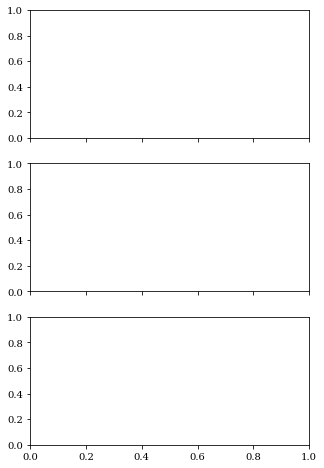

In [15]:
%matplotlib inline
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(5,8), sharex=True, sharey=True)

s=4
alpha=0.5
vmin=30
vmax = 150
marker='o'
cmap='viridis_r'

conv, = np.where(np.logical_and(z<30,z>0))
conv, = np.where(z==10)
Bz_conv = Bz[conv]
rortex_conv = rortex[conv]
Sh_conv = Sh[conv]
Sv_conv = Sv[conv]
radius_conv = radius[conv]
beta_conv = beta[conv]
T_conv = 4.*np.pi/np.abs(rortex_conv)

chrom, = np.where(np.logical_and(z>90,z<120))
chrom,=np.where(z==100)
Bz_chrom = Bz[chrom]
rortex_chrom = rortex[chrom]
Sh_chrom = Sh[chrom]
Sv_chrom = Sv[chrom]
radius_chrom = radius[chrom]
beta_chrom = beta[chrom]
T_chrom = 4.*np.pi/np.abs(rortex_chrom)

phot, = np.where(np.logical_and(z>40, z<70))
phot, = np.where(z==40)
Bz_phot = Bz[phot]
rortex_phot = rortex[phot]
Sh_phot = Sh[phot]
Sv_phot = Sv[phot]
radius_phot = radius[phot]
beta_phot = beta[phot]
T_phot = 4.*np.pi/np.abs(rortex_phot)
######################################

ax = axes[0]
arg = np.argsort(radius_conv)
radius_conv = radius_conv[arg]
beta_conv = beta_conv[arg]
rortex_conv = rortex_conv[arg]
# Plot
im = ax.scatter(beta_conv, 
                rortex_conv, 
                c=radius_conv, 
                s=s, 
                alpha=alpha,
                vmin=vmin, 
                vmax=vmax, 
                marker=marker,
                cmap=cmap)

# Title
#ax.set_title('Convection')

# Labels
ax.set_ylabel(r'$\langle R \rangle_{\rm swirl}~~[{\rm Hz}]$')

# Axis
ax.set_xlim(1e-3,1e6)
ax.set_ylim(-0.6,0.6)
ax.axvline(1, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')
ax.set_xscale('log')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Add text
ax.text(3.0e2, 
        -0.52,
        r'Convection zone',
        size=12,
        bbox=dict(boxstyle="round", 
                  fc=(1.0, 1.0, 1.0),
                  ec=(0.0, 0.0, 0.0),)
       )

######################################

ax = axes[1]
arg = np.argsort(radius_phot)
radius_phot = radius_phot[arg]
beta_phot = beta_phot[arg]
rortex_phot = rortex_phot[arg]

# Plot
im = ax.scatter(beta_phot, 
                rortex_phot, 
                c=radius_phot, 
                s=s, 
                alpha=alpha,
                vmin=vmin, 
                vmax=vmax, 
                marker=marker,
                cmap=cmap)

# Title
#ax.set_title('Photosphere')

# Labels
ax.set_ylabel(r'$\langle R \rangle_{\rm swirl}~~[{\rm Hz}]$')

# Axis
#ax.set_xlim(-300,1000)
#ax.set_ylim(0,400)
ax.axvline(1, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Add text
ax.text(2.0e3, 
        -0.52,
        r'Photosphere',
        size=12,
        bbox=dict(boxstyle="round", 
                  fc=(1.0, 1.0, 1.0),
                  ec=(0.0, 0.0, 0.0),)
       )

######################################

ax = axes[2]

arg = np.argsort(radius_chrom)
radius_chrom = radius_chrom[arg]
beta_chrom = beta_chrom[arg]
rortex_chrom = rortex_chrom[arg]
# Plot
im = ax.scatter(beta_chrom, 
                rortex_chrom, 
                c=radius_chrom, 
                s=s, 
                alpha=alpha,
                vmin=vmin, 
                vmax=vmax, 
                marker=marker,
                cmap=cmap)

# Title
#ax.set_title('Chromosphere')

# Labels
ax.set_ylabel(r'$\langle R \rangle_{\rm swirl}~~[{\rm Hz}]$')
ax.set_xlabel(r'$\langle$plasma-$\beta \rangle_{\rm swirl}~~[{\rm -}]$')

# Axis
#ax.set_xlim(-300,1000)
#ax.set_ylim(0,400)
ax.axvline(1, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Add text
ax.text(7.0e2, 
        -0.52,
        r'Chromosphere',
        size=12,
        bbox=dict(boxstyle="round", 
                  fc=(1.0, 1.0, 1.0),
                  ec=(0.0, 0.0, 0.0),)
       )

#####################################

# Colorbar

cb_ax = fig.add_axes([0.157, 0.98, 0.787, 0.012])
cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal')
cbar.set_label(r'$r_{\rm eff}~~[{\rm km}]$')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
#####################################

fig.tight_layout(h_pad=0.1)
#fig.savefig('../Figures/Test_Stat_beta_Rz_r.pdf', bbox_inches = 'tight', pad_inches = 0.01)
#fig.savefig('../Figures/Test_Stat_beta_Rz_r.png', dpi=200, bbox_inches = 'tight', pad_inches = 0.01)
fig.savefig('../Figures/Test_Stat_beta_Rz_r.png', dpi=200, bbox_inches = 'tight', pad_inches = 0.2)

# Plot : Test_Stat_Msz_Rz_Bz

In [ ]:
%matplotlib inline
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(5,8), sharex=True, sharey=True)

s=4
alpha=.5
vmax = 1e3
vmin= -vmax
marker='o'
cmap='RdBu_r'

conv, = np.where(np.logical_and(z<30,z>0))
conv, = np.where(z==10)
Bz_conv = Bz[conv]
rortex_conv = rortex[conv]
Sh_conv = Sh[conv]
Sv_conv = Sv[conv]
Sz_conv = Sh_conv + Sv_conv
radius_conv = radius[conv]
beta_conv = beta[conv]
T_conv = 4.*np.pi/np.abs(rortex_conv)
MSz_conv = MSz[conv]

chrom, = np.where(np.logical_and(z>90,z<120))
chrom,=np.where(z==100)
Bz_chrom = Bz[chrom]
rortex_chrom = rortex[chrom]
Sh_chrom = Sh[chrom]
Sv_chrom = Sv[chrom]
Sz_chrom = Sh_chrom + Sv_chrom
radius_chrom = radius[chrom]
beta_chrom = beta[chrom]
T_chrom = 4.*np.pi/np.abs(rortex_chrom)
MSz_chrom = MSz[chrom]

phot, = np.where(np.logical_and(z>40, z<70))
phot, = np.where(z==40)
Bz_phot = Bz[phot]
rortex_phot = rortex[phot]
Sh_phot = Sh[phot]
Sv_phot = Sv[phot]
Sz_phot = Sh_phot + Sv_phot
radius_phot = radius[phot]
beta_phot = beta[phot]
T_phot = 4.*np.pi/np.abs(rortex_phot)
MSz_phot = MSz[phot]
######################################

ax = axes[0]

# Plot
im = ax.scatter(MSz_conv, 
                rortex_conv, 
                c=Bz_conv, 
                s=s, 
                alpha=alpha,
                marker=marker,
                cmap=cmap,
                norm=colors.SymLogNorm(linthresh=10, linscale=0.03,
                                              vmin=vmin, vmax=vmax, base=10)
               )

# Title
#ax.set_title('Convection')

# Labels
ax.set_ylabel(r'$\langle R \rangle_{\rm swirl}~~[{\rm Hz}]$')

# Axis
ax.set_xlim(-3e-4,3e-4)
ax.set_ylim(-0.6,0.6)
ax.axvline(0, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')
ax.set_xscale('symlog', linthresh=1.7e-7)

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Add text
ax.text(-1.5e-4, 
        -0.52,
        r'Convection zone',
        size=12,
        bbox=dict(boxstyle="round", 
                  fc=(1.0, 1.0, 1.0),
                  ec=(0.0, 0.0, 0.0),)
       )

######################################

ax = axes[1]

# Plot
im = ax.scatter(MSz_phot, 
                rortex_phot, 
                c=Bz_phot, 
                s=s, 
                alpha=alpha,
                marker=marker,
                cmap=cmap,
                norm=colors.SymLogNorm(linthresh=10, linscale=0.03,
                                              vmin=vmin, vmax=vmax, base=10)
                )

# Title
#ax.set_title('Photosphere')

# Labels
ax.set_ylabel(r'$\langle R \rangle_{\rm swirl}~~[{\rm Hz}]$')

# Axis
#ax.set_xlim(-300,1000)
#ax.set_ylim(0,400)
ax.axvline(0, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Add text
ax.text(-1.5e-4, 
        -0.52,
        r'Photosphere',
        size=12,
        bbox=dict(boxstyle="round", 
                  fc=(1.0, 1.0, 1.0),
                  ec=(0.0, 0.0, 0.0),)
       )

######################################

ax = axes[2]

# Plot
im = ax.scatter(MSz_chrom, 
                rortex_chrom, 
                c=Bz_chrom, 
                s=s, 
                alpha=alpha,
                marker=marker,
                cmap=cmap,
                norm=colors.SymLogNorm(linthresh=5, linscale=0.03,
                                              vmin=vmin, vmax=vmax, base=10)
                )

# Title
#ax.set_title('Chromosphere')

# Labels
ax.set_ylabel(r'$\langle R \rangle_{\rm swirl}~~[{\rm Hz}]$')
ax.set_xlabel(r'$\langle \lambda^{\rm B} \rangle_{\rm swirl}~~[{\rm G}\,{\rm cm}^{-1}]$')
ax.set_xticks([-1e-4,-1e-5,-1e-6,-1e-7,0,1e-7,1e-6,1e-5,1e-4])

# Axis
#ax.set_xlim(-300,1000)
#ax.set_ylim(0,400)
ax.axvline(0, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Add text
ax.text(-1.5e-4, 
        -0.52,
        r'Chromosphere',
        size=12,
        bbox=dict(boxstyle="round", 
                  fc=(1.0, 1.0, 1.0),
                  ec=(0.0, 0.0, 0.0),)
       )

#####################################

# Colorbar

cb_ax = fig.add_axes([0.157, 0.98, 0.814, 0.012])
cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal', ticks=[-1e3,-1e2,-1e1,0,1e1,1e2,1e3])
cbar.set_label(r'$\langle B_{z} \rangle_{\rm swirl}~~[{\rm G}]$')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
#####################################

fig.tight_layout(h_pad=0.1)
#fig.savefig('../Figures/Test_Stat_Msz_Rz_Bz.pdf', bbox_inches = 'tight', pad_inches = 0.01)
#fig.savefig('../Figures/Test_Stat_Msz_Rz_Bz.png', dpi=200, bbox_inches = 'tight', pad_inches = 0.01)
fig.savefig('../Figures/Test_Stat_Msz_Rz_Bz.png', dpi=200, bbox_inches = 'tight', pad_inches = 0.2)

# Find 3D structures

In [32]:
def extract_3D_structures(data, delta_xy, delta_z, z_i, z_th_up, z_th_down):
    import itertools
    
    # Create dictionary for fast search
    vortexdata = dict()
    for v in data:
        vortexdata[(int(v[0]),int(v[1]),int(v[2]))] = v
        
    # Create chromosphere dictionary with 2D vortices at zi   
    chromosphere = dict()
    for i in vortexdata:
        z = i[2]
        if z == z_i:
            chromosphere[i] = vortexdata[i]
    
    # loop over 2D vortices in the chromosphere and connect with other 2D vortices
    # colocated within some range (delta,delta,deltaz)
    deltas = list(itertools.product(delta_z, delta_xy, delta_xy))
    vortices = []
    for v in chromosphere:
        x = int(v[0])
        y = int(v[1])
        z = int(v[2])
        vortex = dict()
        vortex[v] = chromosphere[v]
        test=1
        while test:
            test=0
            for dk,di,dj in deltas:
                if (x+di,y+dj,z+dk) in vortexdata and test == 0:
                    vortex[(x+di,y+dj,z+dk)] = vortexdata[(x+di,y+dj,z+dk)]
                    x+=di
                    y+=dj
                    z+=dk
                    test+=1
        test=1
        x = int(v[0])
        y = int(v[1])
        z = int(v[2])
        while test:
            test=0
            for dk,di,dj in deltas:
                if (x+di,y+dj,z-dk) in vortexdata and test == 0:
                    vortex[(x+di,y+dj,z+dk)] = vortexdata[(x+di,y+dj,z-dk)]
                    x+=di
                    y+=dj
                    z-=dk
                    test+=1
                    
        if len(vortex.keys())>1:
            vortices.append(vortex)
            
    # Keep only the vortices which reach a certain height (z_th)
    connected_data = []
    for v in vortices:
        connected_down = False
        connected_up = False
        for (x,y,z) in v.keys():
            if z <= z_th_down: 
                connected_down = True
            if z >= z_th_up:
                connected_up = True
        if connected_down and connected_up:
            connected_data.append(v)
    
    # Recreate the list data from the dictionary
    connected_vortices = []
    for v in connected_data:
        vortex = []
        for k in v.values():
            vortex.append(k)
        vortex = np.vstack(vortex)
        connected_vortices.append(vortex)
    
    # vstack for numpy array
    #connected_vortices = np.vstack(connected_vortices)
    
    return connected_vortices

## For 3D visualization

In [33]:
# Extract 3D structures from all snapshots

d = np.load('newdata/vortexdata_t5774_final.npy')

delta_xy = np.arange(-4,5)
delta_z = np.array([-1,-2])
#delta_z = np.array([-5,-10])
z_th_up = 70
z_th_down = 70
z_i = 70
structures = extract_3D_structures(d, delta_xy, delta_z, z_i, z_th_up, z_th_down)
np.save('newdata/structures3D_all_t5774.npy', np.array(structures, dtype=object))


In [44]:
# Extract 3D structures from all snapshots

data = []
for t in snapshots:
    data.append(np.load('newdata/vortexdata_t'+str(t).zfill(4)+'_final.npy'))

delta_xy = np.arange(-4,5)
delta_z = np.array([-1,-2])
#delta_z = np.array([-5,-10])
z_th_up = 70
z_th_down = 70
z_i = 70
connected_vortices = []
for d,t in zip(data,snapshots):
    structures = extract_3D_structures(d, delta_xy, delta_z, z_i, z_th_up, z_th_down)
    np.save('newdata/structures3D_all_t'+str(t)+'.npy', np.array(structures, dtype=object))
    connected_vortices.append(structures)

In [61]:
# Extract 3D structures from all snapshots

data = []
for t in snapshots:
    data.append(np.load('newdata/vortexdata_t'+str(t).zfill(4)+'_final.npy'))

delta_xy = np.arange(-4,5)
delta_z = np.array([-1,-2])
#delta_z = np.array([-5,-10])
z_th_up = 100
z_th_down = 30
z_i = 70
connected_vortices = []
for d,t in zip(data,snapshots):
    structures = extract_3D_structures(d, delta_xy, delta_z, z_i, z_th_up, z_th_down)
    np.save('newdata/structures3D_t'+str(t)+'.npy', np.array(structures, dtype=object))
    connected_vortices.append(structures)

In [62]:
# # test
# %matplotlib notebook

# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111, projection='3d')

# N = len(connected_vortices[0])
# color=iter(cm.hsv(np.linspace(0,1,N)))

# for v in connected_vortices[2]:
#     x = []
#     y = []
#     z = []
#     r = []
#     for i,j,k,s in zip(v[:,0],v[:,1],v[:,2],v[:,3]):
#         x.append(i*10)
#         y.append(j*10)
#         z.append((k-30)*10)
#         r.append(s)
#     r = np.vstack(r)
    
#     c = next(color)
#     ax.scatter(x,y,z,color=c,marker='o',s=r**2)
# plt.show()

# Plot: Test_Stat_Msz_Rz_Bz_connected

/net/cephfs/home/jcaniv/my_venv/lib/python3.7/site-packages/ipykernel_launcher.py:139: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


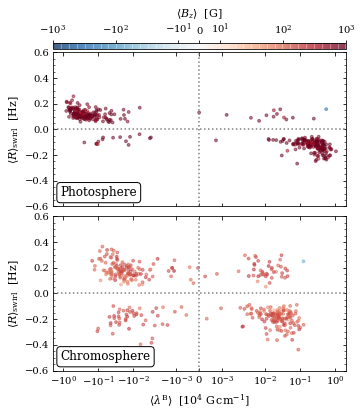

In [63]:
%matplotlib inline
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(5,5.3), sharex=True, sharey=True)

s=8
alpha=.5
vmax = 1e3
vmin= -vmax
marker='o'
cmap='RdBu_r'

z_phot = 40 # 100 km
z_chrom = 100 # 700 km
z_conv = 10 # -200 km
data_chrom = []
data_phot = []
data_conv = []
for snaps in connected_vortices:
    for v in snaps:
        chrom, = np.where(v[:,2]==z_chrom)
        data_chrom.append(v[chrom])
        phot, = np.where(v[:,2]==z_phot)
        data_phot.append(v[phot])
        conv, = np.where(v[:,2]==z_conv)
        data_conv.append(v[conv])

data_chrom = np.vstack(data_chrom)
data_phot = np.vstack(data_phot)
data_conv = np.vstack(data_conv)


Bz_chrom = data_chrom[:,13]
rortex_chrom = data_chrom[:,4]
beta_chrom = data_chrom[:,7]
T_chrom = 4.*np.pi/np.abs(rortex_chrom)
MSz_chrom = data_chrom[:,15]*1e4

Bz_phot = data_phot[:,13]
rortex_phot = data_phot[:,4]
beta_phot = data_phot[:,7]
T_phot = 4.*np.pi/np.abs(rortex_phot)
MSz_phot = data_phot[:,15]*1e4
######################################

ax = axes[0]

# Plot
im = ax.scatter(MSz_phot, 
                rortex_phot, 
                c=Bz_phot, 
                s=s, 
                alpha=alpha,
                marker=marker,
                cmap=cmap,
                norm=colors.SymLogNorm(linthresh=10, linscale=0.03,
                                              vmin=vmin, vmax=vmax, base=10)
                )
# Title
#ax.set_title('Convection')

# Labels
ax.set_ylabel(r'$\langle R \rangle_{\rm swirl}~~[{\rm Hz}]$')

# Axis
ax.set_xlim(-2,2)
ax.set_ylim(-0.6,0.6)
ax.axvline(0, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')
ax.set_xscale('symlog', linthresh=1.7e-3)

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Add text
ax.text(-1.2, 
        -0.52,
        r'Photosphere',
        size=12,
        bbox=dict(boxstyle="round", 
                  fc=(1.0, 1.0, 1.0),
                  ec=(0.0, 0.0, 0.0),)
       )

######################################

ax = axes[1]

# Plot
im = ax.scatter(MSz_chrom, 
                rortex_chrom, 
                c=Bz_chrom, 
                s=s, 
                alpha=alpha,
                marker=marker,
                cmap=cmap,
                norm=colors.SymLogNorm(linthresh=5, linscale=0.03,
                                              vmin=vmin, vmax=vmax, base=10)
                )

# Title
#ax.set_title('Photosphere')

# Labels
ax.set_ylabel(r'$\langle R \rangle_{\rm swirl}~~[{\rm Hz}]$')
ax.set_xlabel(r'$\langle \lambda^{\rm B} \rangle ~~[10^4~{\rm G}\,{\rm cm}^{-1}]$')
ax.set_xticks([-1,-1e-1,-1e-2,-1e-3,0,1e-3,1e-2,1e-1,1])

# Axis
#ax.set_xlim(-300,1000)
#ax.set_ylim(0,400)
ax.axvline(0, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Add text
ax.text(-1.2, 
        -0.52,
        r'Chromosphere',
        size=12,
        bbox=dict(boxstyle="round", 
                  fc=(1.0, 1.0, 1.0),
                  ec=(0.0, 0.0, 0.0),)
       )

#####################################

# Colorbar

cb_ax = fig.add_axes([0.157, 0.97, 0.814, 0.018])
cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal', ticks=[-1e3,-1e2,-1e1,0,1e1,1e2,1e3])
cbar.set_label(r'$\langle B_{z} \rangle ~~[{\rm G}]$')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
#####################################

fig.tight_layout(h_pad=0.1)
#fig.savefig('../Figures/Test_Stat_Msz_Rz_Bz_connected.pdf', bbox_inches = 'tight', pad_inches = 0.01)
#fig.savefig('../Figures/Test_Stat_Msz_Rz_Bz_connected.png', dpi=200, bbox_inches = 'tight', pad_inches = 0.01)
fig.savefig('../Figures/Test_Stat_Msz_Rz_Bz_connected.png', dpi=200, bbox_inches = 'tight', pad_inches = 0.2)

# Alfvénic imprints of vortices

In [64]:
dz=1

def compute_fraction(data):
    
    Alfvenic_indices = []
    for d in data:
        Alf_index = np.sign(d[:,13]*d[:,4]*d[:,15])
        ratios_Alf = []
        for zi in np.arange(0,131,dz):
            mask_z, = np.where(d[:,2]==zi)
            NumberAlf, = np.where(Alf_index[mask_z]<0)
            if mask_z.shape[0]>0:
                ratios_Alf.append(NumberAlf.shape[0]/mask_z.shape[0])
            else:
                ratios_Alf.append(0.0)
        Alfvenic_indices.append(ratios_Alf)
    zrange = np.arange(0,131,dz)
    frac = np.zeros((zrange.shape[0], len(Alfvenic_indices)))
    for Alf,i in zip(Alfvenic_indices,range(0,len(Alfvenic_indices))):
        frac[:,i]=np.array(Alf)
        
    return frac

In [65]:
dz = 1
snapshots = range(240,7201,240)
zrange = np.arange(0,131,dz)

data = []
for t in snapshots:
    data.append(np.load('newdata/vortexdata_t'+str(t).zfill(4)+'_final.npy'))

# Compute fraction for all the data
frac_all = compute_fraction(data)

# Compute fraction for connected vortices only
connected_data = []
for snaps in connected_vortices:
    data = []
    for v in snaps:
        data.append(v)
    data = np.vstack(data)
    connected_data.append(data)
    
frac_conn = compute_fraction(connected_data)

# Plot : Test_Stat_AlfvenImprints.pdf

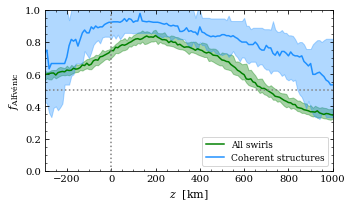

In [66]:
%matplotlib inline
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(5,3), sharex=True, sharey=False)

f_all_p = []
f_conn_p = []
for i in np.arange(frac_all.shape[0]):
    f_all_p.append(percentiles(frac_all[i]))
    f_conn_p.append(percentiles(frac_conn[i]))

f_all_p = np.vstack(f_all_p)
f_conn_p = np.vstack(f_conn_p)

z_shift = (zrange-30)*10

# Colors
winter = cm.get_cmap('Greens_r')
cBlu = 'green'
summer = cm.get_cmap('Blues_r')
cRed = 'dodgerblue'
######################################

ax = axes

ax.plot(z_shift,
        f_all_p[:,2], 
        color=cBlu,
        linestyle='-',
        label=r'All swirls')
ax.fill_between(z_shift,
                f_all_p[:,1], f_all_p[:,3],
                alpha=0.35,
                color=cBlu)
# ax.fill_between(z_shift,
#                 f_all_p[:,0], f_all_p[:,4],
#                 alpha=0.2,
#                 color=cBlu)

ax.plot(z_shift,
        f_conn_p[:,2], 
        color=cRed,
        linestyle='-',
        label=r'Coherent structures')
ax.fill_between(z_shift,
                f_conn_p[:,1], f_conn_p[:,3],
                alpha=0.35,
                color=cRed)
# ax.fill_between(z_shift,
#                 f_conn_p[:,0], f_conn_p[:,4],
#                 alpha=0.2,
#                 color=cRed)

# Labels
ax.set_xlabel(r'$z~~[{\rm km}]$')
ax.set_ylabel(r'$f_{\rm Alfvénic}$')

# Axes
ax.set_ylim(0,1.0)
ax.set_xlim(-300,1000)
ax.axvline(0, linestyle=':', color='Gray')
ax.axhline(0.5, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Legend
ax.legend(loc=4)


fig.tight_layout(h_pad=0.1)
#fig.savefig('../Figures/Test_Stat_AlfvenImprints.pdf', bbox_inches = 'tight', pad_inches = 0.01)
fig.savefig('../Figures/Test_Stat_AlfvenImprints.png', dpi=200, bbox_inches = 'tight', pad_inches = 0.2)

# Other stuff

In [ ]:
%matplotlib inline
fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(5,8), sharex=True, sharey=False)

dz = 2
# Data
zrange = np.arange(0,131,dz)
n1 = zrange.shape[0]
n2 = len(data)

Nz = np.zeros((n1,n2))
Rz = np.zeros((n1,n2))
Rzmax = np.zeros((n1,n2))
Tz = np.zeros((n1,n2))
k = 0
for i in zrange:
    for j in np.arange(n2):
        mask = np.where(data[j][:,2]==i)
        Nz[k,j] = mask[0].shape[0]
        Rz[k,j] = np.mean(data[j][mask,3])*10
        Rzmax[k,j] = np.max(data[j][mask,3])*10
        Tz[k,j] = np.mean(4.*np.pi/np.abs(data[j][mask,4][0]))
    k+=1

Nz_av = np.mean(Nz, axis=1)
Nz_std = np.std(Nz, axis=1)
Rz_av = np.mean(Rz, axis=1)
Rz_std = np.std(Rz, axis=1)
Rzmax_av = np.mean(Rzmax, axis=1)
Rzmax_std = np.std(Rzmax, axis=1)
Tz_av = np.mean(Tz, axis=1)
Tz_std = np.std(Tz, axis=1)

z_shift = (zrange-30)*10

# Colors
winter = cm.get_cmap('Greens_r')
cBlu = winter(0.1)
######################################
ax = axes[0]
Area = 9.8*9.8
# Plot
ax.plot(z_shift, Nz_av/Area, 
        linestyle=':',
        color=cBlu)
ax.fill_between(z_shift, Nz_av/Area-Nz_std/Area, Nz_av/Area+Nz_std/Area, 
                alpha=0.4,
                color=cBlu,
                edgecolor=cBlu)

# Labels
ax.set_ylabel(r'$n_{\rm 2D}~~[{\rm Mm}^{-2}]$')

# Axis
ax.set_xlim(-300,1000)
ax.set_ylim(0,5.5)
ax.axvline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

######################################

ax = axes[1]

# Plot
ax.plot(z_shift, Rz_av, 
        linestyle=':',
        color=cBlu)
ax.fill_between(z_shift, Rz_av-Rz_std, Rz_av+Rz_std, 
                alpha=0.4,
                color=cBlu,
                edgecolor=cBlu)

# Labels
ax.set_ylabel(r'$\bar{r}_{\rm eff}~~[{\rm km}]$')

# Axis
ax.set_ylim(0,80)
ax.axvline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()
######################################

ax = axes[2]

# Plot
ax.plot(z_shift, Rzmax_av, 
        linestyle=':',
        color=cBlu)
ax.fill_between(z_shift, Rzmax_av-Rzmax_std, Rzmax_av+Rzmax_std, 
                alpha=0.4,
                color=cBlu,
                edgecolor=cBlu)

# Labels
ax.set_ylabel(r'$r_{\rm eff}^{\rm \,max}~~[{\rm km}]$')

# Axis
ax.set_ylim(0,300)
ax.axvline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

######################################
ax = axes[3]

# Plot
ax.plot(z_shift, Tz_av, 
        linestyle=':',
        color=cBlu)
ax.fill_between(z_shift, Tz_av-Tz_std, Tz_av+Tz_std, 
                alpha=0.4,
                color=cBlu,
                edgecolor=cBlu)

# Labels
ax.set_xlabel(r'$z~~[{\rm km}]$')
ax.set_ylabel(r'$\bar{T}_{\rm eff}~~[{\rm s}]$')

# Axis
ax.set_ylim(0,230)
ax.axvline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

#####################################

fig.align_ylabels(axes[:])

plt.tight_layout(h_pad=0.1)
#plt.savefig('../Figures/Test_Stat_z.pdf', bbox_inches = 'tight', pad_inches = 0.01)
plt.savefig('../Figures/Test_Stat_z.png', dpi=200, bbox_inches = 'tight', pad_inches = 0.2)

In [ ]:
# Example: radius at photosphere
mask = np.where(z==100)
data = 4.*np.pi/np.abs(rortex[mask])
data = radius[mask]
#data = Nz[10]
data_mean = np.mean(data)
data_var = np.abs(data-data_mean)
#percen = np.percentile(data_var, [25,50,75])

binwidth = 15
xstart = data.min()
xend = data.max()
bins = np.arange(xstart,xend,binwidth)
entries, bin_edges, patches = plt.hist(data, bins, density=True)

#plt.axvline(data_mean, color='r')
percen = np.percentile(data, [2.3,15.9,50,84.1,87.7])
plt.axvline(percen[0], linestyle=':')
plt.axvline(percen[1], linestyle=':')
plt.axvline(percen[2], linestyle=':')
plt.axvline(percen[3], linestyle=':')
plt.axvline(percen[4], linestyle=':')

Var = np.var(data)
mu = np.mean(data)
p =  (mu/Var)
r = mu**2 / (Var-mu)
n = len(data)

# from scipy.stats import nbinom
# #plt.plot(bins + binwidth/2 ,          (nbinom.cdf(bins+binwidth,r,p) - nbinom.cdf(bins,r,p)), color='red')

# from scipy.stats import gamma
# param = gamma.fit(data, floc=2)
# pdf_fitted = gamma.pdf(bins, *param)
# #plt.plot(bins, pdf_fitted, color='r', linestyle=':')

from scipy.stats import genextreme
param = genextreme.fit(data)
pdf_fitted = genextreme.pdf(bins, *param)
plt.plot(bins, pdf_fitted, color='r', linestyle=':')

plt.axvline(param[1],color='green')

In [ ]:
%matplotlib inline
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(5,3), sharex=True, sharey=False)

f_all_av = np.mean(frac_all, axis=1)
f_all_std = np.std(frac_all, axis=1)

f_conn_av = np.mean(frac_conn, axis=1)
f_conn_std = np.std(frac_conn, axis=1)

z_shift = (zrange-30)*10

# Colors
winter = cm.get_cmap('Greens_r')
cBlu = 'green'
summer = cm.get_cmap('Blues_r')
cRed = 'dodgerblue'
######################################

ax = axes

ax.plot(z_shift,
        f_all_av, 
        color=cBlu,
        linestyle='-',
        label=r'All vortices')
ax.fill_between(z_shift,
                f_all_av-f_all_std,
                f_all_av+f_all_std,
                alpha=0.4,
                color=cBlu,
                edgecolor=cBlu)

ax.plot(z_shift,
        f_conn_av, 
        color=cRed,
        linestyle='-',
        label=r'Connecting structures')
ax.fill_between(z_shift,
                f_conn_av-f_conn_std,
                f_conn_av+f_conn_std,
                alpha=0.4,
                color=cRed,
                edgecolor=cRed)

# Labels
ax.set_xlabel(r'$z~~[{\rm km}]$')
ax.set_ylabel(r'$\rho_{\rm A}$')

# Axes
ax.set_ylim(0,1.0)
ax.set_xlim(-300,1000)
ax.axvline(0, linestyle=':', color='Gray')
ax.axhline(0.5, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Legend
ax.legend(loc=4)


fig.tight_layout(h_pad=0.1)
#fig.savefig('../Figures/Test_Stat_AlfvenImprints.pdf', bbox_inches = 'tight', pad_inches = 0.01)
fig.savefig('../Figures/Test_Stat_AlfvenImprints.png', dpi=200, bbox_inches = 'tight', pad_inches = 0.2)

[1.33151676 0.89481588]


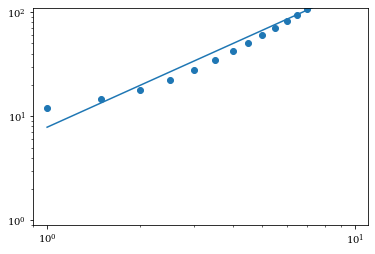

In [59]:
x = np.arange(1,10,0.5)
y = 2*x**2 + 10

plt.figure()
plt.scatter(x,y)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.9,11)
plt.ylim(0.9,110)

linear_model=np.polyfit(np.log10(x),np.log10(y),1)
print(linear_model)
a, b = linear_model
plt.plot(x, (10**b)*x**a)

In [57]:
10**np.log10(2)

2.0

In [ ]:
%matplotlib inline
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(5,8), sharex=True, sharey=True)

vmax = 2e8

conv, = np.where(z<30)
conv, = np.where(z==10)
Bz_conv = Bz[conv]
rortex_conv = rortex[conv]
Sh_conv = Sh[conv]
Sv_conv = Sv[conv]
radius_conv = radius[conv]
T_conv = 4.*np.pi/np.abs(rortex_conv)

chrom, = np.where(z>100)
chrom,=np.where(z==100)
Bz_chrom = Bz[chrom]
rortex_chrom = rortex[chrom]
Sh_chrom = Sh[chrom]
Sv_chrom = Sv[chrom]
radius_chrom = radius[chrom]
T_chrom = 4.*np.pi/np.abs(rortex_chrom)

phot, = np.where(np.logical_and(z>40, z<90))
phot, = np.where(z==40)
Bz_phot = Bz[phot]
rortex_phot = rortex[phot]
Sh_phot = Sh[phot]
Sv_phot = Sv[phot]
radius_phot = radius[phot]
T_phot = 4.*np.pi/np.abs(rortex_phot)
######################################

ax = axes[0]

# Plot
im = ax.scatter(Bz_conv, 
                rortex_conv, 
                c=Sh_conv+Sv_conv, 
                s=0.5, vmin=-vmax, 
                vmax=vmax, 
                cmap='coolwarm')

# Title
#ax.set_title('Convection')

# Labels
ax.set_ylabel(r'$R_z~~[{\rm s}^{-1}]$')

# Axis
ax.set_xlim(-2500,2500)
ax.set_ylim(-0.75,0.75)
ax.axvline(0, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')
ax.set_xscale('symlog', linthresh=30)

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

######################################

ax = axes[1]

# Plot
im = ax.scatter(Bz_phot, 
                rortex_phot, 
                c=Sh_phot+Sv_phot, 
                s=0.5, 
                vmin=-vmax, 
                vmax=vmax, 
                cmap='coolwarm')

# Title
#ax.set_title('Photosphere')

# Labels
ax.set_ylabel(r'$R_z~~[{\rm s}^{-1}]$')

# Axis
#ax.set_xlim(-300,1000)
#ax.set_ylim(0,400)
ax.axvline(0, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()
######################################

ax = axes[2]

# Plot
im = ax.scatter(Bz_chrom, 
                rortex_chrom, 
                c=Sh_chrom+Sv_chrom, 
                s=0.5, 
                vmin=-vmax, 
                vmax=vmax, 
                cmap='coolwarm')

# Title
#ax.set_title('Chromosphere')

# Labels
ax.set_ylabel(r'$R_z~~[{\rm s}^{-1}]$')
ax.set_xlabel(r'$B_z~~[{\rm G}]$')

# Axis
#ax.set_xlim(-300,1000)
#ax.set_ylim(0,400)
ax.axvline(0, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

#####################################

fig.tight_layout(h_pad=0.1)
#fig.savefig('../Figures/Test_Stat_Bz_Rz_Sz.pdf', bbox_inches = 'tight', pad_inches = 0.01)

In [ ]:
%matplotlib inline
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(5,8), sharex=True, sharey=True)

s=8
alpha=.5
vmax = 1e8
vmin= -vmax
marker='o'
cmap='RdBu_r'

conv, = np.where(np.logical_and(z<30,z>0))
conv, = np.where(z==10)
Bz_conv = Bz[conv]
rortex_conv = rortex[conv]
Sh_conv = Sh[conv]
Sv_conv = Sv[conv]
Sz_conv = Sh_conv + Sv_conv
radius_conv = radius[conv]
beta_conv = beta[conv]
T_conv = 4.*np.pi/np.abs(rortex_conv)

chrom, = np.where(np.logical_and(z>90,z<120))
chrom,=np.where(z==100)
Bz_chrom = Bz[chrom]
rortex_chrom = rortex[chrom]
Sh_chrom = Sh[chrom]
Sv_chrom = Sv[chrom]
Sz_chrom = Sh_chrom + Sv_chrom
radius_chrom = radius[chrom]
beta_chrom = beta[chrom]
T_chrom = 4.*np.pi/np.abs(rortex_chrom)

phot, = np.where(np.logical_and(z>40, z<70))
phot, = np.where(z==40)
Bz_phot = Bz[phot]
rortex_phot = rortex[phot]
Sh_phot = Sh[phot]
Sv_phot = Sv[phot]
Sz_phot = Sh_phot + Sv_phot
radius_phot = radius[phot]
beta_phot = beta[phot]
T_phot = 4.*np.pi/np.abs(rortex_phot)
######################################

ax = axes[0]

# Plot
im = ax.scatter(Bz_conv, 
                rortex_conv, 
                c=Sz_conv, 
                s=s, 
                alpha=alpha,
                vmin=vmin, 
                vmax=vmax, 
                marker=marker,
                cmap=cmap)

# Title
#ax.set_title('Convection')

# Labels
ax.set_ylabel(r'$R_z~~[{\rm s}^{-1}]$')

# Axis
ax.set_xlim(-3000,3000)
ax.set_ylim(-0.6,0.6)
ax.axvline(0, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')
ax.set_xscale('symlog', linthresh=30)

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Add text
ax.text(-2.1e3, 
        -0.52,
        r'Convection zone',
        size=12,
        bbox=dict(boxstyle="round", 
                  fc=(1.0, 1.0, 1.0),
                  ec=(0.0, 0.0, 0.0),)
       )

######################################

ax = axes[1]

# Plot
im = ax.scatter(Bz_phot, 
                rortex_phot, 
                c=Sz_phot, 
                s=s, 
                alpha=alpha,
                vmin=vmin, 
                vmax=vmax, 
                marker=marker,
                cmap=cmap)

# Title
#ax.set_title('Photosphere')

# Labels
ax.set_ylabel(r'$R_z~~[{\rm s}^{-1}]$')

# Axis
#ax.set_xlim(-300,1000)
#ax.set_ylim(0,400)
ax.axvline(0, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Add text
ax.text(-2.1e3, 
        -0.52,
        r'Photosphere',
        size=12,
        bbox=dict(boxstyle="round", 
                  fc=(1.0, 1.0, 1.0),
                  ec=(0.0, 0.0, 0.0),)
       )

######################################

ax = axes[2]

# Plot
im = ax.scatter(Bz_chrom, 
                rortex_chrom, 
                c=Sz_chrom, 
                s=s, 
                alpha=alpha,
                vmin=vmin, 
                vmax=vmax, 
                marker=marker,
                cmap=cmap)

# Title
#ax.set_title('Chromosphere')

# Labels
ax.set_ylabel(r'$R_z~~[{\rm s}^{-1}]$')
ax.set_xlabel(r'$B_z~~[{\rm G}]$')

# Axis
#ax.set_xlim(-300,1000)
#ax.set_ylim(0,400)
ax.axvline(0, linestyle=':', color='Gray')
ax.axhline(0, linestyle=':', color='Gray')

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

# Add text
ax.text(-2.1e3, 
        -0.52,
        r'Chromosphere',
        size=12,
        bbox=dict(boxstyle="round", 
                  fc=(1.0, 1.0, 1.0),
                  ec=(0.0, 0.0, 0.0),)
       )

#####################################

# Colorbar

cb_ax = fig.add_axes([0.17, 0.98, 0.79, 0.012])
cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal')
cbar.set_label(r'$S_{z}~~[10^8~{\rm erg}\,{\rm cm}^{-2}]$')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
#####################################

fig.tight_layout(h_pad=0.1)
fig.savefig('../Figures/Test_Stat_Bz_Rz_Sz.pdf', bbox_inches = 'tight', pad_inches = 0.01)

In [341]:
Tot_conv = np.shape(Bz_conv)[0]
Tot_phot = np.shape(Bz_phot)[0]
Tot_chrom = np.shape(Bz_chrom)[0]
Alf_conv, = np.where(np.sign(Bz_conv*rortex_conv*MSz_conv)<0)
Alf_phot, = np.where(np.sign(Bz_phot*rortex_phot*MSz_phot)<0)
Alf_chrom, = np.where(np.sign(Bz_chrom*rortex_chrom*MSz_chrom)<0)

print('Fraction of vortices having possibly "Alphenic nature" in CZ:',Alf_conv.shape[0]/Tot_conv)
print('Fraction of vortices having possibly "Alphenic nature" in photosphere:',Alf_phot.shape[0]/Tot_phot)
print('Fraction of vortices having possibly "Alphenic nature" in chromosphere:',Alf_chrom.shape[0]/Tot_chrom)

# Data in the photosphere and chromosphere only

z_phot = 40 # 100 km
z_chrom = 100 # 700 km
z_conv = 10 # -200 km
data_chrom = []
data_phot = []
data_conv = []
for v in connected_vortices:
    chrom, = np.where(v[:,2]==z_chrom)
    data_chrom.append(v[chrom])
    phot, = np.where(v[:,2]==z_phot)
    data_phot.append(v[phot])
    conv, = np.where(v[:,2]==z_conv)
    data_conv.append(v[conv])

data_chrom = np.vstack(data_chrom)
data_phot = np.vstack(data_phot)
data_conv = np.vstack(data_conv)

print('Averange number of connected vortices in CZ:',data_conv.shape[0]/np.arange(5550,6101,50).shape[0])
print('Averange number of connected vortices in photosphere:',data_phot.shape[0]/np.arange(5550,6101,50).shape[0])
print('Averange number of connected vortices in chromosphere:',data_chrom.shape[0]/np.arange(5550,6101,50).shape[0])

tot_conv_conn = np.shape(data_conv)[0]
tot_phot_conn = np.shape(data_phot)[0]
tot_chrom_conn = np.shape(data_chrom)[0]
A_conv_conn, = np.where(np.sign(data_conv[:,13]*data_conv[:,4]*data_conv[:,15])<0)
A_phot_conn, = np.where(np.sign(data_phot[:,13]*data_phot[:,4]*data_phot[:,15])<0)
A_chrom_conn, = np.where(np.sign(data_chrom[:,13]*data_chrom[:,4]*data_chrom[:,15])<0)

print('Fraction of vortices having possibly "Alphenic nature" in CZ:',A_conv_conn.shape[0]/tot_conv_conn)
print('Fraction of vortices having possibly "Alphenic nature" in photosphere:',A_phot_conn.shape[0]/tot_phot_conn)
print('Fraction of vortices having possibly "Alphenic nature" in chromosphere:',A_chrom_conn.shape[0]/tot_chrom_conn)

Fraction of vortices having possibly "Alphenic nature" in CZ: 0.6428371180263527
Fraction of vortices having possibly "Alphenic nature" in photosphere: 0.8237738985868661
Fraction of vortices having possibly "Alphenic nature" in chromosphere: 0.49837000814995924
Averange number of connected vortices in CZ: 3.9166666666666665
Averange number of connected vortices in photosphere: 9.25
Averange number of connected vortices in chromosphere: 9.166666666666666
Fraction of vortices having possibly "Alphenic nature" in CZ: 0.8723404255319149
Fraction of vortices having possibly "Alphenic nature" in photosphere: 0.8558558558558559
Fraction of vortices having possibly "Alphenic nature" in chromosphere: 0.6181818181818182


<IPython.core.display.Javascript object>


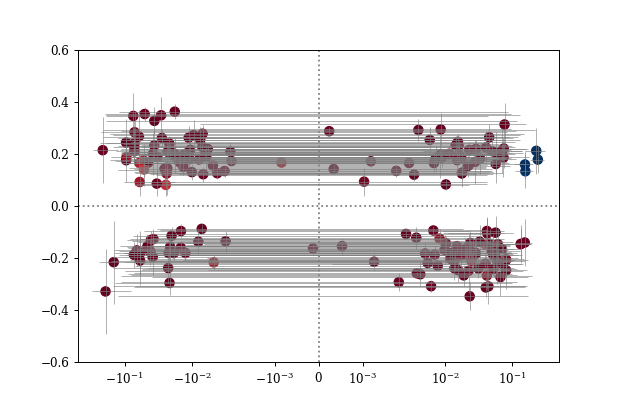

In [249]:
plt.figure()
for v in connected_vortices:
    mask, = np.where(v[:,2]==100)
    plt.errorbar(v[mask,15]*1e4,v[mask,4],v[mask,16]*1e4,v[mask,5],'none',ecolor='Grey',elinewidth=0.5)
    plt.scatter(v[mask,15]*1e4,v[mask,4],c=v[mask,13],vmax=1e2, vmin=-1e2, cmap='RdBu_r',s=60)
#plt.colorbar()
# Axis
plt.xlim(-0.5,0.5)
plt.ylim(-0.6,0.6)
plt.axvline(0, linestyle=':', color='Gray')
plt.axhline(0, linestyle=':', color='Gray')
plt.xscale('symlog', linthresh=1.7e-3)

In [209]:
len(connected_vortices)

12

<IPython.core.display.Javascript object>


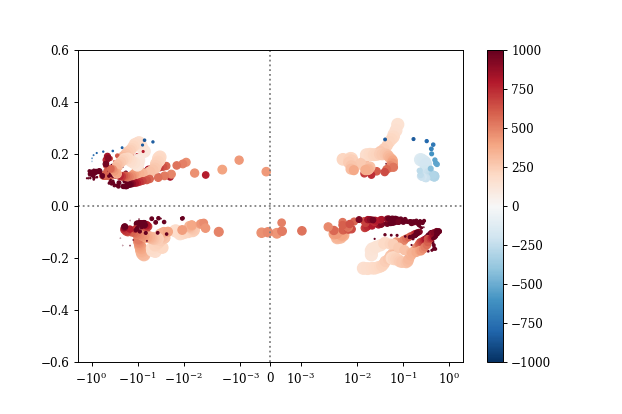

In [203]:
t=5600
data = np.load('vortexdata2_t'+str(t)+'.npy')

delta_xy = np.arange(-4,5)
delta_z = np.array([-2,-4,-6])
z_th = 30
z_i = 100
connected_vortices = extract_3D_structures(data, delta_xy, delta_z, z_i, z_th)

plt.figure()
plt.scatter(connected_vortices[:,15]*1e4,connected_vortices[:,4], s=connected_vortices[:,2]**2/1e2, c=(connected_vortices[:,13]), vmax=1e3, vmin=-1e3, cmap='RdBu_r')
plt.colorbar()
# Axis
plt.xlim(-2,2)
plt.ylim(-0.6,0.6)
plt.axvline(0, linestyle=':', color='Gray')
plt.axhline(0, linestyle=':', color='Gray')
plt.xscale('symlog', linthresh=1.7e-3)

In [157]:
vortexdata = dict()
for v in data:
    vortexdata[(int(v[0]),int(v[1]),int(v[2]))] = v

In [158]:
photosphere = dict()
for i in vortexdata:
    z = i[2]
    if z == 100:
        photosphere[i] = vortexdata[i]

In [390]:
import itertools

vortices = []
for v in photosphere:
    x = v[0]
    y = v[1]
    z = v[2]
    vortex = dict()
    vortex[v] = photosphere[v]
    test=1
    while test:
        zplus=z+2
        delta = np.arange(-4,5)
        deltaz = np.array([-2,-4,-6])
        deltas = list(itertools.product(deltaz, delta, delta))
        test=0
        for dk,di,dj in deltas:
            if (x+di,y+dj,z+dk) in vortexdata and test == 0:
                vortex[(x+di,y+dj,z+dk)] = vortexdata[(x+di,y+dj,z+dk)]
                x+=di
                y+=dj
                z+=dk
                test+=1
    if len(vortex.keys())>1:
        vortices.append(vortex)
        
                

            

<IPython.core.display.Javascript object>


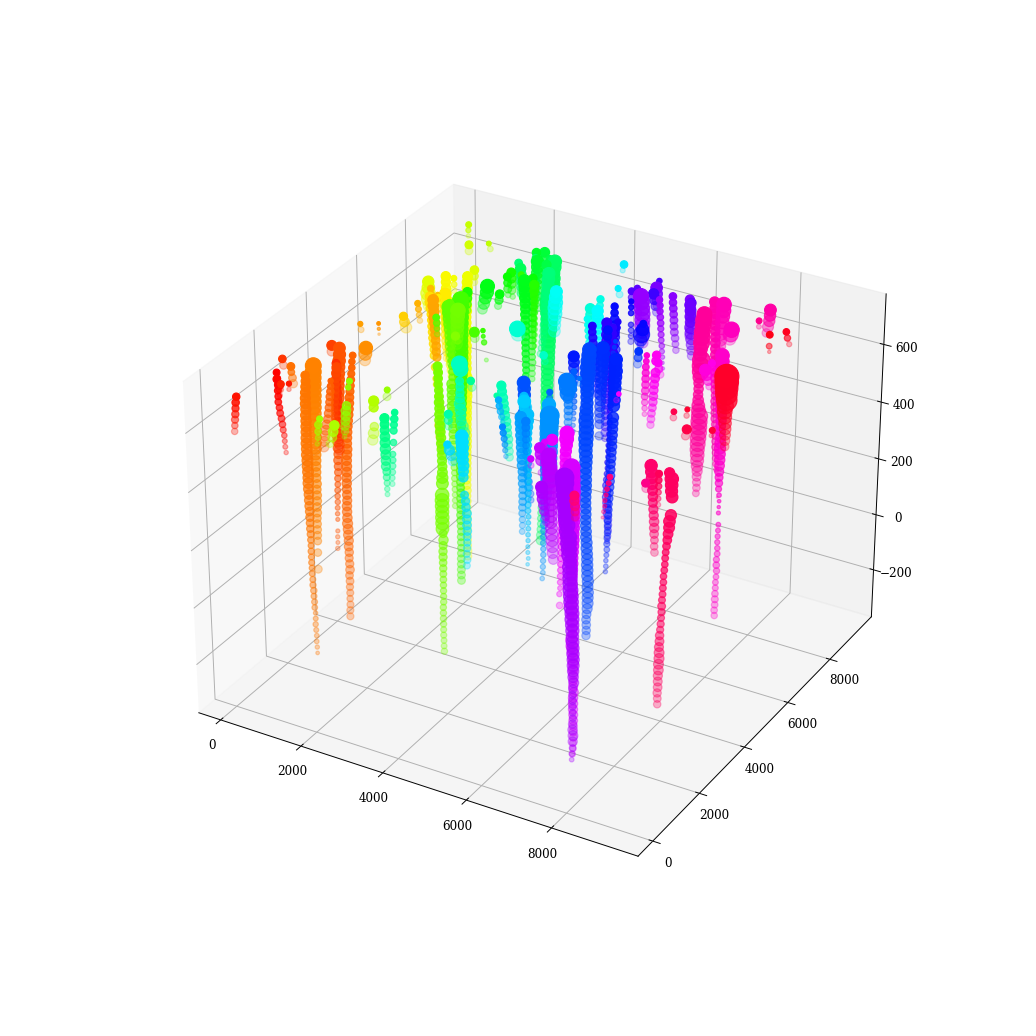

In [392]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

N = len(vortices)
color=iter(cm.hsv(np.linspace(0,1,N)))
x = []
y = []
z = []
r = []
for i,j,k in vortexdata.keys():
    x.append(i*10)
    y.append(j*10)
    z.append((k-30)*10)
    r.append(vortexdata[(i,j,k)][3])
r = np.vstack(r)
#ax.scatter(x,y,z,color='grey',marker='o',s=r**2, alpha=0.3)

for v in vortices:
    x = []
    y = []
    z = []
    r = []
    for i,j,k in v.keys():
        x.append(i*10)
        y.append(j*10)
        z.append((k-30)*10)
        r.append(v[(i,j,k)][3])
    r = np.vstack(r)
    
    c = next(color)
    ax.scatter(x,y,z,color=c,marker='o',s=r**2)
plt.show()

In [393]:
vortices

[{(34,
   145,
   100): array([ 3.42192118e+01,  1.45268473e+02,  1.00000000e+02,  5.61361548e+00,
          1.60365707e-01,  8.83381085e-02,  1.00000000e+00,  7.47798648e-01,
          2.27931384e-01, -5.16490700e+06,  2.22832760e+07,  4.67662600e+07,
          7.27525440e+07,  9.13331680e+01,  1.10452986e+01,  5.98211909e-06,
          8.21062349e-06]),
  (35,
   146,
   98): array([ 3.50690608e+01,  1.46643646e+02,  9.80000000e+01,  5.14001173e+00,
          1.54442889e-01,  8.62270739e-02,  1.00000000e+00,  7.81600353e-01,
          2.33218801e-01, -1.07007790e+07,  2.27922160e+07,  4.25000320e+07,
          8.29121200e+07,  9.54800339e+01,  1.15693903e+01,  7.34353762e-06,
          8.63994774e-06]),
  (35,
   148,
   96): array([ 3.55337079e+01,  1.48101124e+02,  9.60000000e+01,  4.91849076e+00,
          1.47293262e-01,  8.11984596e-02,  1.00000000e+00,  8.47968545e-01,
          2.49352624e-01, -1.51038960e+07,  2.28700900e+07,  4.62049200e+07,
          8.86898560e+07,  1.0003

In [161]:
connected_vortices = []
for v in vortices:
    connected = False
    for (x,y,z) in v.keys():
        if z < 50:
            connected = True
    if connected:
        connected_vortices.append(v)

In [162]:
connected_data = []
for v in connected_vortices:
    for k in v.values():
        connected_data.append(k)

connected_data = np.vstack(connected_data)

<IPython.core.display.Javascript object>


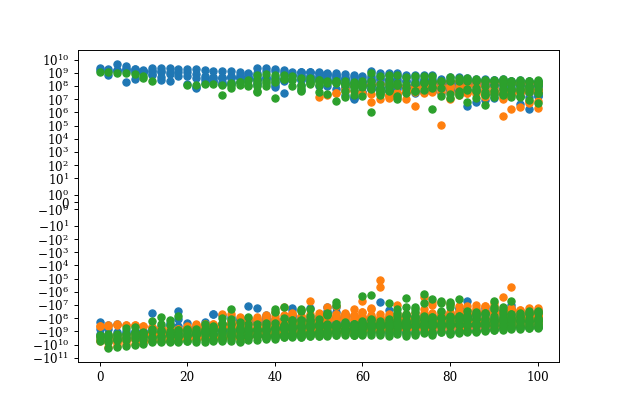

In [163]:
plt.figure()
plt.scatter(connected_data[:,2], connected_data[:,11])
plt.scatter(connected_data[:,2], connected_data[:,9])
plt.scatter(connected_data[:,2], connected_data[:,9]+connected_data[:,11])

plt.yscale('symlog')

<IPython.core.display.Javascript object>


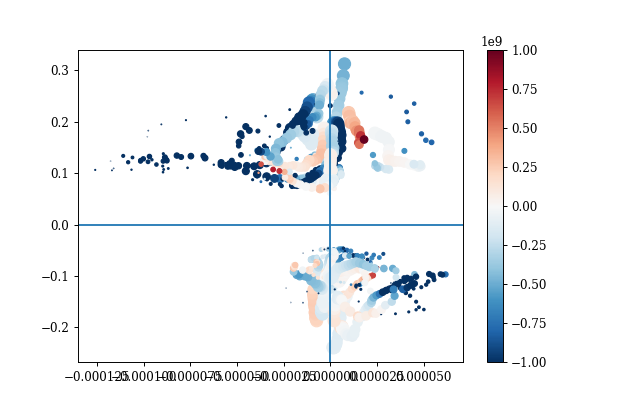

In [166]:
plt.figure()
plt.scatter(connected_data[:,15],connected_data[:,4], s=connected_data[:,2]**2/100, c=(connected_data[:,11]+connected_data[:,9]), vmax=1e9, vmin=-1e9, cmap='RdBu_r')
plt.axvline(0)
plt.axhline(0)
plt.colorbar()

<IPython.core.display.Javascript object>


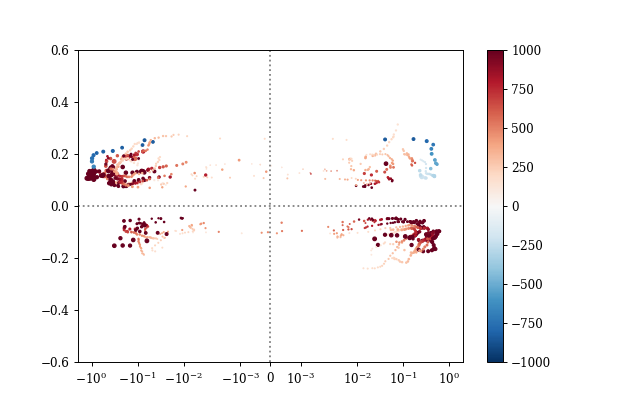

In [174]:
plt.figure()
plt.scatter(connected_data[:,15]*1e4,connected_data[:,4], s=connected_data[:,16]*1e5, c=(connected_data[:,13]), vmax=1e3, vmin=-1e3, cmap='RdBu_r')
plt.colorbar()
# Axis
plt.xlim(-2,2)
plt.ylim(-0.6,0.6)
plt.axvline(0, linestyle=':', color='Gray')
plt.axhline(0, linestyle=':', color='Gray')
plt.xscale('symlog', linthresh=1.7e-3)

In [51]:
np.mean(connected_data[:,11]+connected_data[:,9])

-244231142.33832762

<IPython.core.display.Javascript object>


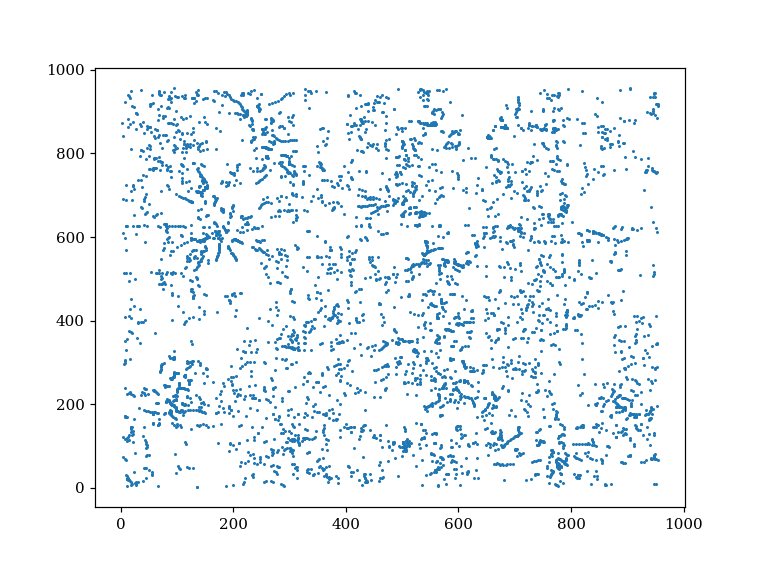

In [432]:
plt.figure()
plt.scatter(data[:,0], data[:,1], s=1)

In [381]:
data[-1]

array([ 8.84569767e+02,  1.00403488e+03,  1.30000000e+02,  3.52336282e+00,
        5.15016661e-01,  2.40958334e-01,  1.00000000e+00,  3.00075802e-02,
        9.02444117e-03, -1.77828960e+07,  8.77913800e+06,  1.68222160e+07,
        1.60679190e+07,  2.85391979e+01,  3.22401881e+00, -3.57002887e-06,
        1.84135820e-06])

In [408]:
import itertools
a = [0,1]
c = np.arange(-3,4)
list(itertools.product(a, c, c))

[(0, -3, -3),
 (0, -3, -2),
 (0, -3, -1),
 (0, -3, 0),
 (0, -3, 1),
 (0, -3, 2),
 (0, -3, 3),
 (0, -2, -3),
 (0, -2, -2),
 (0, -2, -1),
 (0, -2, 0),
 (0, -2, 1),
 (0, -2, 2),
 (0, -2, 3),
 (0, -1, -3),
 (0, -1, -2),
 (0, -1, -1),
 (0, -1, 0),
 (0, -1, 1),
 (0, -1, 2),
 (0, -1, 3),
 (0, 0, -3),
 (0, 0, -2),
 (0, 0, -1),
 (0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, -3),
 (0, 1, -2),
 (0, 1, -1),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 2, -3),
 (0, 2, -2),
 (0, 2, -1),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 3, -3),
 (0, 3, -2),
 (0, 3, -1),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (1, -3, -3),
 (1, -3, -2),
 (1, -3, -1),
 (1, -3, 0),
 (1, -3, 1),
 (1, -3, 2),
 (1, -3, 3),
 (1, -2, -3),
 (1, -2, -2),
 (1, -2, -1),
 (1, -2, 0),
 (1, -2, 1),
 (1, -2, 2),
 (1, -2, 3),
 (1, -1, -3),
 (1, -1, -2),
 (1, -1, -1),
 (1, -1, 0),
 (1, -1, 1),
 (1, -1, 2),
 (1, -1, 3),
 (1, 0, -3),
 (1, 0, -2),
 (1, 0, -1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 

In [180]:
chrom_pp, = np.where(np.logical_and(Bz_chrom>0,rortex_chrom>0))
chrom_pn, = np.where(np.logical_and(Bz_chrom>0,rortex_chrom<0))
Sz_chrom = Sh_chrom
Sz_chrom_pp = Sz_chrom[chrom_pp]
Sz_chrom_pn = Sz_chrom[chrom_pn]
print(np.mean(Sz_chrom_pp))
print(np.mean(Sz_chrom_pn))
print(np.mean(Sz_chrom))

3757531.081229253
4126635.5897569647
3789592.232365018


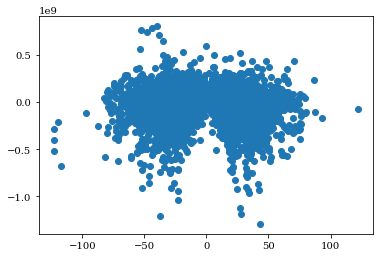

In [165]:
plt.scatter(-Bz_chrom*rortex_chrom, Sh_chrom+Sv_chrom)

In [369]:
np.arange(-5,6)

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [144]:
phot, = np.where(np.logical_and(z>40, z<90))
Bz_phot = Bz[phot]
rortex_phot = rortex[phot]
Sh_phot = Sh[phot]
Sv_phot = Sv[phot]

ValueError: x and y must have same first dimension, but have shapes (27,) and (1,)

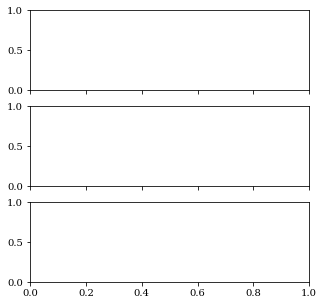

In [88]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(5,5), sharex=True, sharey=False)

zrange = np.arange(0,131,5)
n1 = zrange.shape[0]
n2 = len(data)

Nz = np.zeros((n1))
Rz = np.zeros((n1))
Rzmax = np.zeros((n1))
Tz = np.zeros((n1))
k = 0
for i in zrange:
    mask = np.where(data_all[:,2]==i)
    Nz[k] = mask[0].shape[0]
    Rz[k] = np.mean(data_all[mask,3])
    Rzmax[k] = np.max(data_all[mask,3])
    Tz[k] = np.mean(4.*np.pi/np.abs(data_all[mask,4][0]))
    k+=1

Nz_av = np.mean(Nz, axis=0)
Nz_std = np.std(Nz, axis=0)
Rz_av = np.mean(Rz, axis=0)
Rz_std = np.std(Rz, axis=0)
Rzmax_av = np.mean(Rzmax, axis=0)
Rzmax_std = np.std(Rzmax, axis=0)
Tz_av = np.mean(Tz, axis=0)
Tz_std = np.std(Tz, axis=0)

z_shift = (zrange-30)*10

######################################
ax = axes[0]

# Plot
ax.plot(z_shift, Nz_av, 
        linestyle=':',
        color='Blue')
ax.fill_between(z_shift, Nz_av-Nz_std, Nz_av+Nz_std, 
                alpha=0.4,
                color='Blue',
                edgecolor='Blue')

# Labels
ax.set_xlabel(r'$z~~[{\rm km}]$')
ax.set_ylabel(r'$N$')

# Axis
ax.set_xlim(-300,1000)
ax.set_ylim(0,1000)

# Ticks
ax.tick_params(axis="both", direction="in", which="both", right=True, top=True)
ax.minorticks_on()

######################################

ax = axes[1]

# Plot
ax.plot(z_shift, Rz_av, 
        linestyle=':',
        color='Blue')
ax.fill_between(z_shift, Rz_av-Rz_std, Rz_av+Rz_std, 
                alpha=0.4,
                color='Blue',
                edgecolor='Blue')

# Labels
ax.set_xlabel(r'$z~~[{\rm km}]$')
ax.set_ylabel(r'$R_{\rm eff}$')

# Axis
ax.set_ylim(0,5.0)
######################################

ax = axes[2]

# Plot
ax.plot(z_shift, Tz_av, 
        linestyle=':',
        color='Blue')
ax.fill_between(z_shift, Tz_av-Tz_std, Tz_av+Tz_std, 
                alpha=0.4,
                color='Blue',
                edgecolor='Blue')

# Labels
ax.set_xlabel(r'$z~~[{\rm km}]$')
ax.set_ylabel(r'$T_{\rm eff}$')

#Axis
ax.set_ylim(0,100)

In [79]:
4.*np.pi/np.abs(data[0][A,4][0])

array([  99.40076226,   51.92016492,  145.2809183 ,   99.25433749,
         39.07171802,   47.85690777,  114.04667652,   99.98396462,
        136.13462869,   93.53809115,  143.00370144,   51.53769348,
        129.39173297,   90.25995588,   38.93013565,   73.27378603,
         89.59464732,  131.44887643,   83.18000051,   97.0010659 ,
         52.94632614,  147.85198943,  103.23778764,   69.4531146 ,
         55.72871014,   56.21309864,  146.18000278,   70.80319114,
         84.91283688,   43.13307627,   77.44958209,  112.48342028,
        267.53608936,   59.45068483,   68.86043071,   71.31437471,
         66.26462728,   46.54322324,  115.55011606,  103.41955431,
         53.68337572,   85.0362915 ,   98.17787093,   54.90444599,
         83.52730529,  193.59023891,   39.31145404,  103.88561054,
         88.77466328,  247.57274945,  337.98850012,  123.91848377,
         46.05509068,  216.66671222, 1460.22008019,  133.67929126,
         90.04443613,  100.38341129,   58.77467348,   70.70762

In [48]:
A = np.load('structures3D_t5550.npy',allow_pickle=True)

In [50]:
A[0]

array([[ 9.42405063e+01,  2.70955696e+02,  7.40000000e+01, ...,
         1.39733782e+01, -1.75389214e-05,  1.29207856e-05],
       [ 9.47105263e+01,  2.69904858e+02,  6.80000000e+01, ...,
         1.37847815e+01, -2.27026012e-05,  1.42245935e-05],
       [ 9.48724696e+01,  2.69487854e+02,  6.60000000e+01, ...,
         1.72247276e+01, -2.41749822e-05,  1.56017668e-05],
       ...,
       [ 1.00151405e+02,  2.74211759e+02,  1.26000000e+02, ...,
         5.72679472e+00, -1.27367946e-06,  2.81264329e-06],
       [ 9.93189474e+01,  2.74334737e+02,  1.28000000e+02, ...,
         5.64526367e+00, -1.10266353e-06,  2.57450552e-06],
       [ 9.90311850e+01,  2.74521830e+02,  1.30000000e+02, ...,
         5.55562449e+00, -1.01769479e-06,  2.43932550e-06]])

In [20]:
# Importing the library
import psutil
 
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])

RAM memory % used: 17.5
